<a href="https://colab.research.google.com/github/Anuksha-Dutta/Mentorness/blob/main/Project_1_Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Time series visualizations illustrating trends and patterns

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("/goldstock.csv")
print("Data loaded successfully")

Data loaded successfully


In [ ]:
data.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [ ]:
data.isnull().sum()

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [ ]:
# deleting column
data.drop(columns='Unnamed: 0', inplace =True)
data.head()


,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


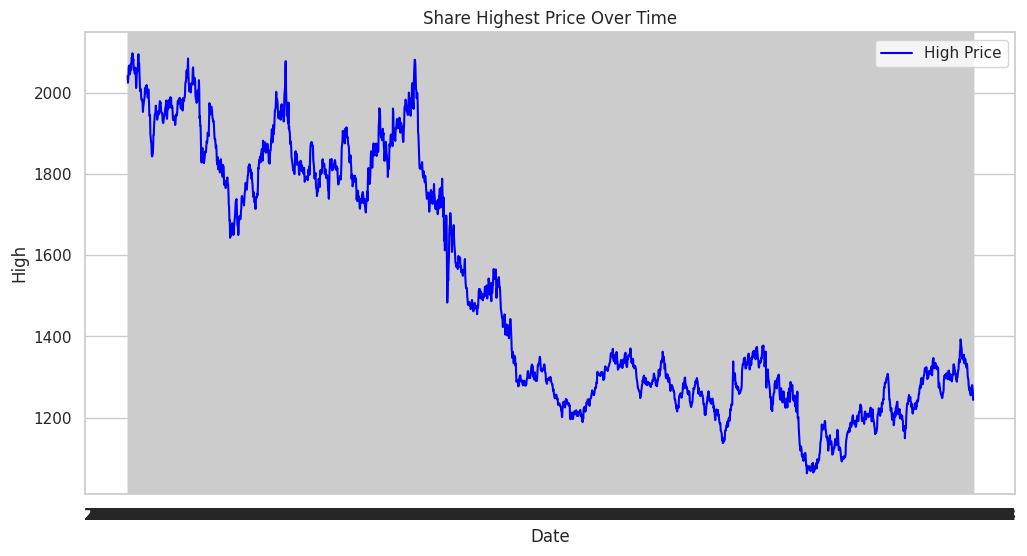

In [ ]:
sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=data, x='Date', y='High', label='High Price', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()


<Figure size 1200x600 with 0 Axes>

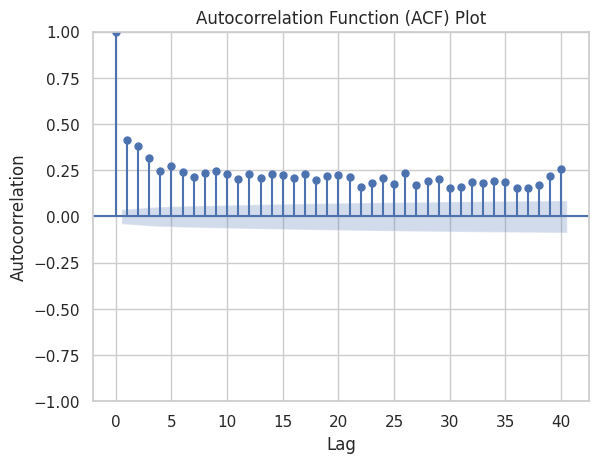

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(data['Volume'], lags=40) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(data['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -1.661563469618377
p-value: 0.4510169335032378
Critical Values: {'1%': -3.432959008741782, '5%': -2.862692648021296, '10%': -2.567383598871881}


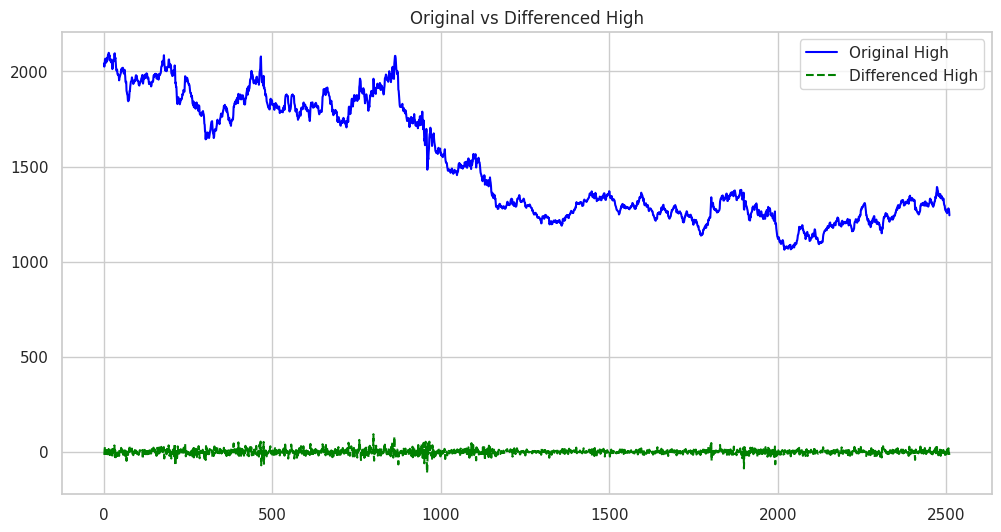

In [ ]:
# Differencing
data['high_diff'] = data['High'].diff()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['High'], label='Original High', color='blue')
plt.plot(data['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()


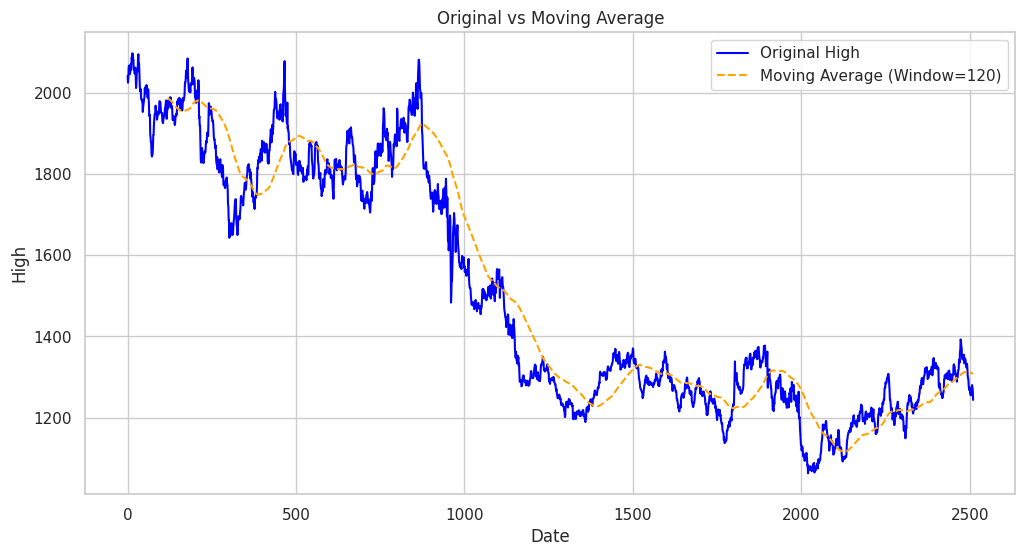

In [ ]:
# Moving Average
window_size = 120
data['high_smoothed'] = data['High'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(data['High'], label='Original High', color='blue')
plt.plot(data['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()


In [ ]:
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([data['High'], data['high_diff']], axis=1)

# Display the combined DataFrame
print(df_combined.head())


     High  high_diff
0  2041.9        NaN
1  2025.6      -16.3
2  2036.1       10.5
3  2062.8       26.7
4  2067.3        4.5


In [ ]:
# Remove rows with missing values
data.dropna(subset=['high_diff'], inplace=True)
data['high_diff'].head()


1   -16.3
2    10.5
3    26.7
4     4.5
5   -11.2
Name: high_diff, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -46.4907384250813
p-value: 0.0
Critical Values: {'1%': -3.432959008741782, '5%': -2.862692648021296, '10%': -2.567383598871881}


# 2. Predictive models for future gold price forecasting

In [ ]:
# Missing Values/Null Values Count
data.isna().sum().sort_values(ascending=False)

high_smoothed    118
Date               0
Close              0
Volume             0
Open               0
High               0
Low                0
high_diff          0
dtype: int64

Correlation Between Columns

<ipython-input-24-d83273fa70d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


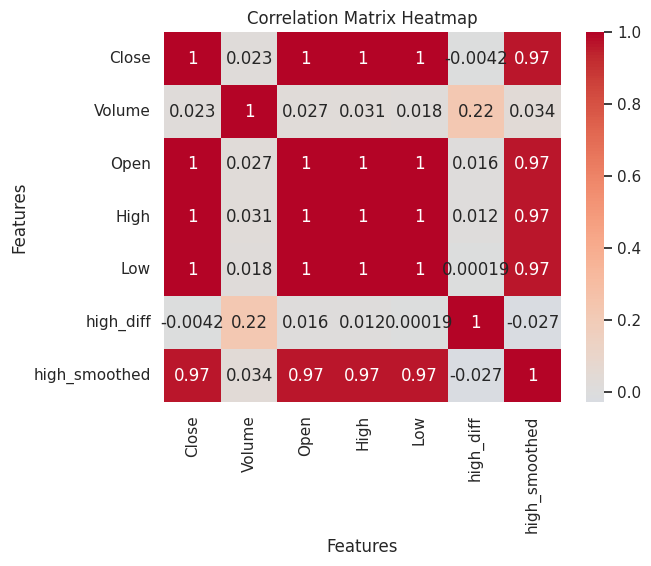

In [ ]:
# Calculate correlation matrix
correlation = data.corr()

# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
			center=0, annot=True)

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()


In [ ]:
#spiltting the features and target
X = data.drop(['Date', 'Close','high_smoothed'], axis=1)
y = data['Close']

In [ ]:
print(X)

        Volume    Open    High     Low  high_diff
1     167013.0  2009.1  2025.6  2007.7      -16.3
2     245194.0  2031.7  2036.1  2004.6       10.5
3     277995.0  2053.4  2062.8  2027.6       26.7
4     250946.0  2033.2  2067.3  2033.1        4.5
5     270624.0  2029.4  2056.1  2017.3      -11.2
...        ...     ...     ...     ...        ...
2506   81426.0  1254.9  1261.9  1248.0       -8.8
2507   63419.0  1269.9  1280.1  1252.0       18.2
2508   34998.0  1264.3  1273.2  1256.9       -6.9
2509   41697.0  1235.1  1267.1  1230.8       -6.1
2510   80262.0  1240.5  1243.5  1235.5      -23.6

[2510 rows x 5 columns]


In [ ]:
X.isnull().sum()

Volume       0
Open         0
High         0
Low          0
high_diff    0
dtype: int64

In [ ]:
print(y)

1       2021.6
2       2006.5
3       2030.2
4       2051.6
5       2019.2
         ...  
2506    1250.5
2507    1263.5
2508    1264.5
2509    1262.5
2510    1238.6
Name: Close, Length: 2510, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

MODEL 1

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
#training model
model1.fit(X_train, y_train)
#making predictions
predictions = model1.predict(X_test)

In [ ]:
from sklearn import metrics
# R squared error
error_score = metrics.r2_score(y_test, predictions)
print('R squared error:', error_score)

R squared error: 0.9997085522028422


MODEL 2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# prediction on Test Data
test_data_prediction = model.predict(X_test)

Testing accuracy

In [ ]:
from sklearn import metrics
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.9994925406435814


Compare the actual values and predicted values in a plot

In [ ]:
y_test = list(y_test)

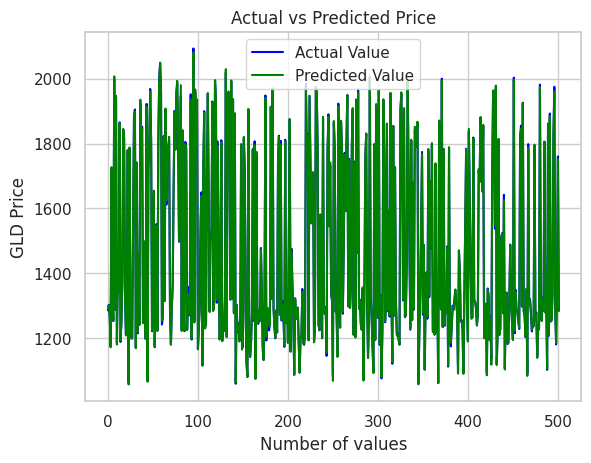

In [ ]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# 3. Back-tested trading strategies with performance metrics

In [ ]:
pip install backtrader

In [ ]:
import backtrader as bt
import datetime
%matplotlib inline

# Define the strategy
class MeanReversionStrategy(bt.Strategy):
    params = (
        ("ma_period", 20),
        ("rsi_period", 14),
        ("rsi_overbought", 70),
        ("rsi_oversold", 30),
    )

    def __init__(self):
        self.ma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.ma_period)
        self.rsi = bt.indicators.RelativeStrengthIndex(period=self.params.rsi_period)

    def next(self):
        if self.data.close > self.ma and self.rsi > self.params.rsi_overbought:
            self.sell()  # Overbought, sell
        elif self.data.close < self.ma and self.rsi < self.params.rsi_oversold:
            self.buy()  # Oversold, buy

# Load historical data
data = pd.read_csv('/goldstock.csv', parse_dates=True, index_col='Date')

# Convert the dataframe to Backtrader data feed
data_feed = bt.feeds.PandasData(dataname=data)

# Create a Backtrader Cerebro engine
cerebro = bt.Cerebro()

# Add the data feed to the engine
cerebro.adddata(data_feed)

# Add the strategy to the engine
cerebro.addstrategy(MeanReversionStrategy)

# Set the initial cash amount
cerebro.broker.set_cash(100000)

# Set the commission - assuming no commission in this example
cerebro.broker.setcommission(commission=0.0)

# Print the starting cash amount
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
cerebro.run()

# Print the final cash amount
print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Plot the strategy results
cerebro.plot(style='candlestick')

plt.show()

Starting Portfolio Value: 100000.00
Ending Portfolio Value: 100570.10


<IPython.core.display.Javascript object>

# 4. Market sentiment analysis reports highlighting key events and their impact.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/gold-dataset-sinha-khandait.csv")
df.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative


In [ ]:
df = df.rename(columns={"Price Sentiment":"Price_Sentiment",})

In [ ]:
df.shape

(10570, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     10570 non-null  object
 1   URL                       10570 non-null  object
 2   News                      10570 non-null  object
 3   Price Direction Up        10570 non-null  int64 
 4   Price Direction Constant  10570 non-null  int64 
 5   Price Direction Down      10570 non-null  int64 
 6   Asset Comparision         10570 non-null  int64 
 7   Past Information          10570 non-null  int64 
 8   Future Information        10570 non-null  int64 
 9   Price_Sentiment           10570 non-null  object
dtypes: int64(6), object(4)
memory usage: 825.9+ KB


(-1.1907513093229165,
 1.2084298935157063,
 -1.1653797962597987,
 1.2043594073240436)

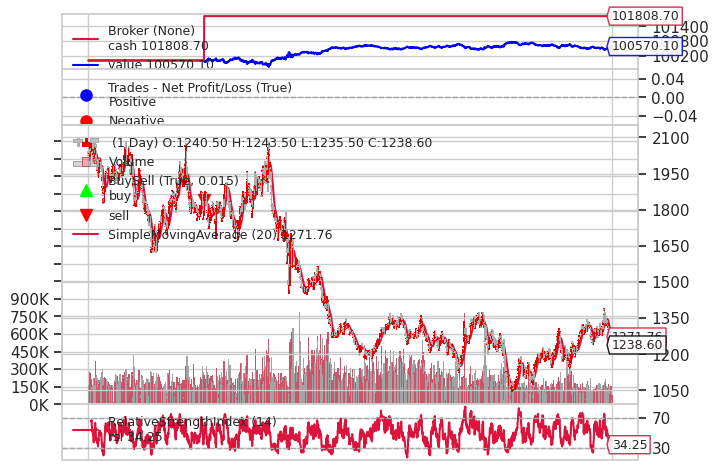

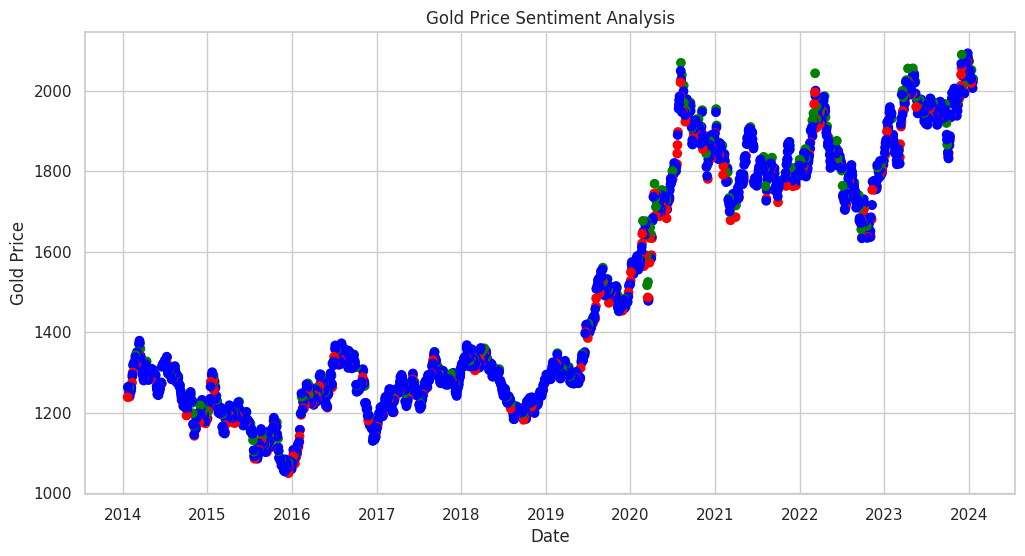

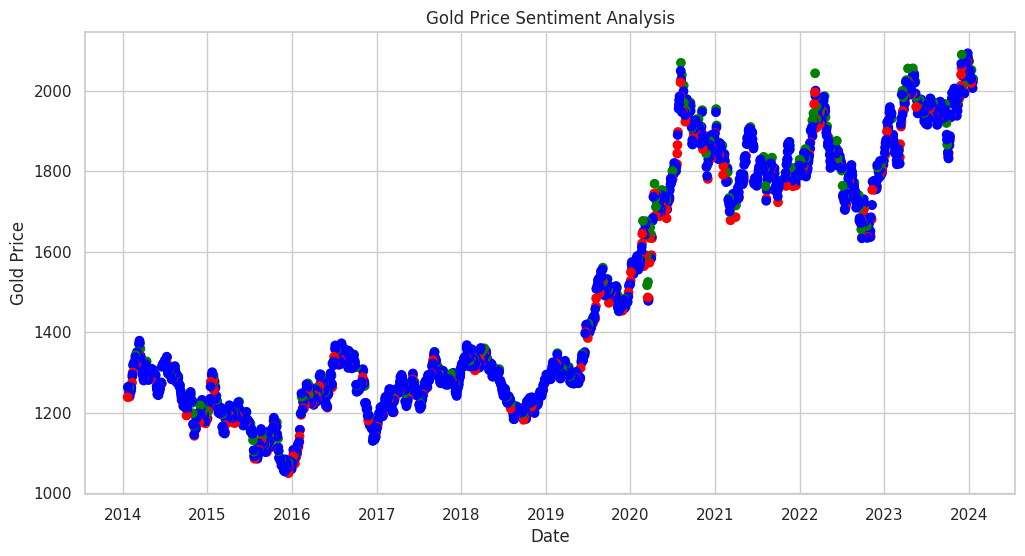

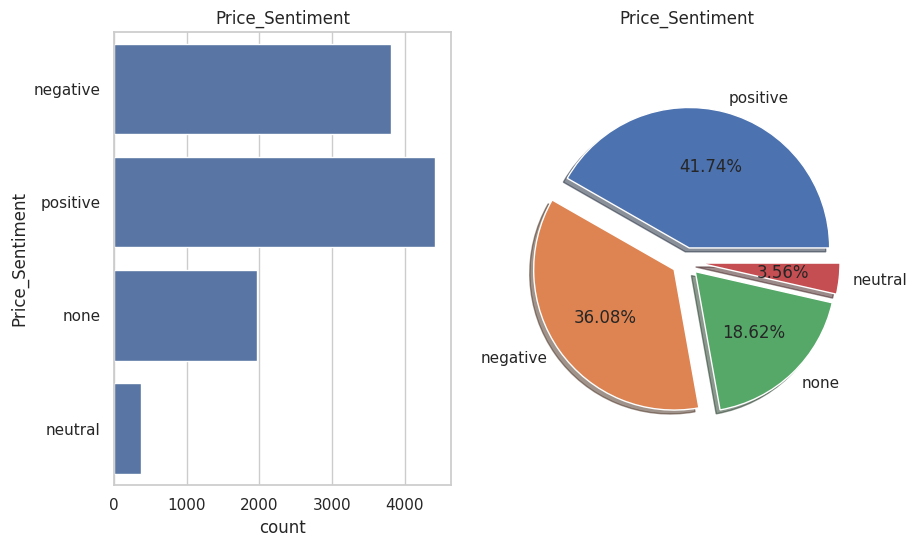

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
sns.countplot(df.Price_Sentiment)
plt.title('Price_Sentiment')
plt.subplot(3,4,2)
Price_Sentiment = df.Price_Sentiment.value_counts()
plt.pie(Price_Sentiment,explode=[0.1,0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Price_Sentiment.index)
plt.title('Price_Sentiment')
plt.axis('equal')

In [ ]:
df = df[df["Price_Sentiment"] != 'none']
df['Price_Sentiment'].value_counts()

positive    4412
negative    3814
neutral      376
Name: Price_Sentiment, dtype: int64

# 5. Statistical analyses providing insights into the characteristics of gold price movements

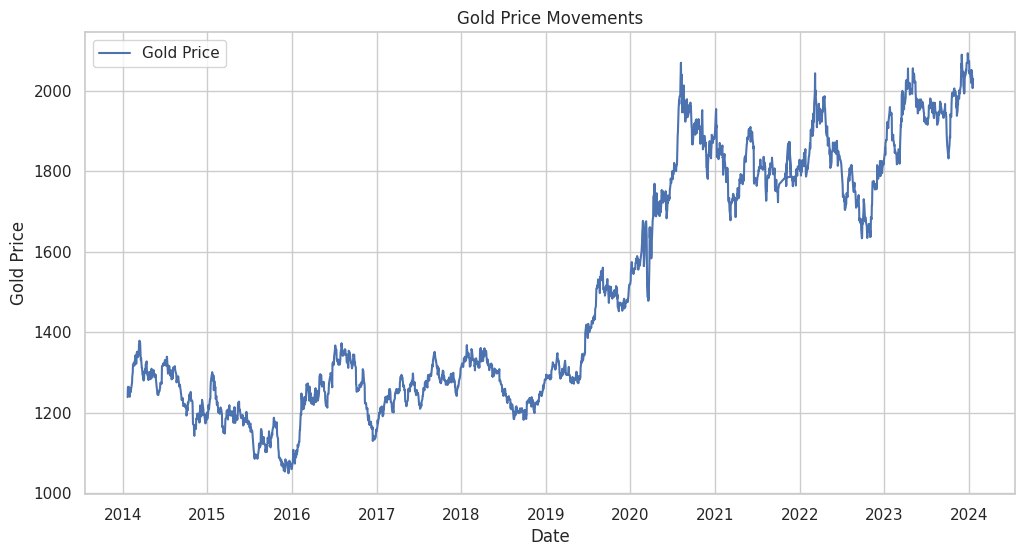

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the gold price dataset
gold_data = pd.read_csv('/goldstock.csv', parse_dates=True, index_col='Date')

# Visualize gold price movements
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Close'], label='Gold Price')
plt.title('Gold Price Movements')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()


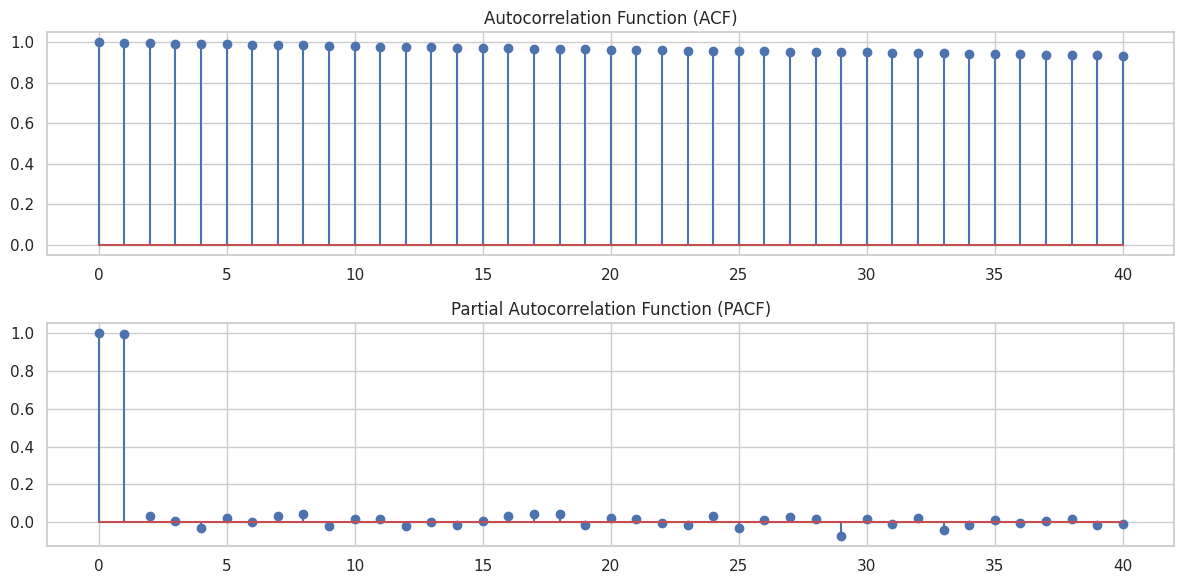

In [ ]:

# Time series analysis using Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
acf_values = sm.tsa.acf(gold_data['Close'], nlags=40)
pacf_values = sm.tsa.pacf(gold_data['Close'], nlags=40, method='ols')

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(acf_values)
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plt.stem(pacf_values)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


count    2511.000000
mean     1498.726085
std       298.824811
min      1049.600000
25%      1249.850000
50%      1332.800000
75%      1805.850000
max      2093.100000
Name: Close, dtype: float64


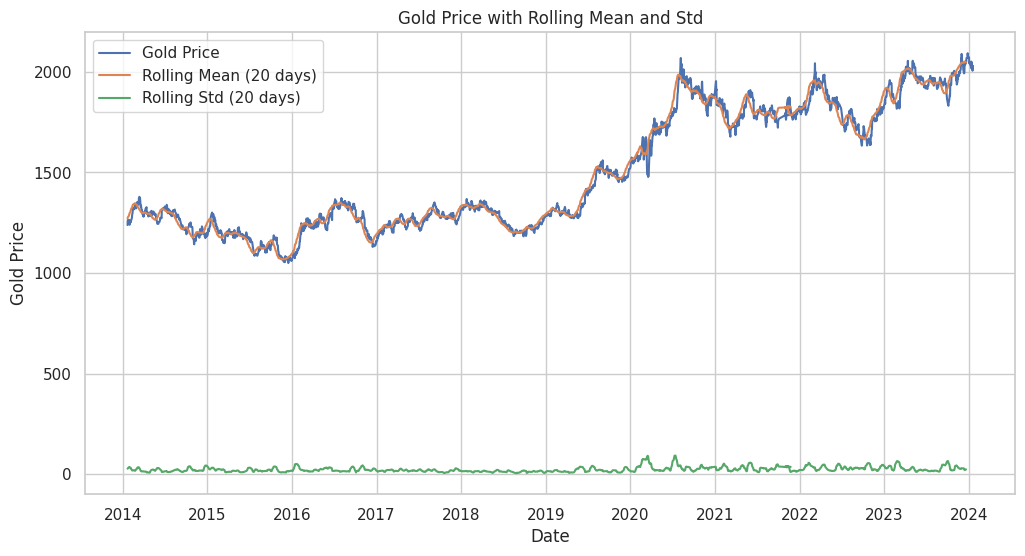

In [ ]:
# Descriptive statistics
stats_summary = gold_data['Close'].describe()
print(stats_summary)

# Explore trends using rolling mean and rolling standard deviation
rolling_mean = gold_data['Close'].rolling(window=20).mean()
rolling_std = gold_data['Close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(gold_data['Close'], label='Gold Price')
plt.plot(rolling_mean, label='Rolling Mean (20 days)')
plt.plot(rolling_std, label='Rolling Std (20 days)')
plt.title('Gold Price with Rolling Mean and Std')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

## References

https://www.geeksforgeeks.org/time-series-data-visualization-in-python/


https://www.geeksforgeeks.org/gold-price-prediction-using-machine-learning/


https://sakibmahmood.medium.com/gold-price-prediction-using-machine-learning-with-python-ec5c5e336713


https://blog.quantinsti.com/gold-price-prediction-using-machine-learning-python/


https://github.com/dipakml/Sentiment-analysis-of-commodity-news-using-NLP/blob/main/README.md#dataset



